# Content with notebooks

You can also create content with Jupyter Notebooks. This means that you can include
code blocks and their outputs in your book.

## Markdown + notebooks

As it is markdown, you can embed images, HTML, etc into your posts!

![](https://myst-parser.readthedocs.io/en/latest/_static/logo-wide.svg)

You can also $add_{math}$ and

$$
math^{blocks}
$$

or

$$
\begin{aligned}
\mbox{mean} la_{tex} \\ \\
math blocks
\end{aligned}
$$

But make sure you \$Escape \$your \$dollar signs \$you want to keep!

## MyST markdown

MyST markdown works in Jupyter Notebooks as well. For more information about MyST markdown, check
out [the MyST guide in Jupyter Book](https://jupyterbook.org/content/myst.html),
or see [the MyST markdown documentation](https://myst-parser.readthedocs.io/en/latest/).

## Code blocks and outputs

Jupyter Book will also embed your code blocks and output in your book.
For example, here's some sample Matplotlib code:

In [1]:
from matplotlib import rcParams, cycler
import matplotlib.pyplot as plt
import numpy as np
plt.ion()

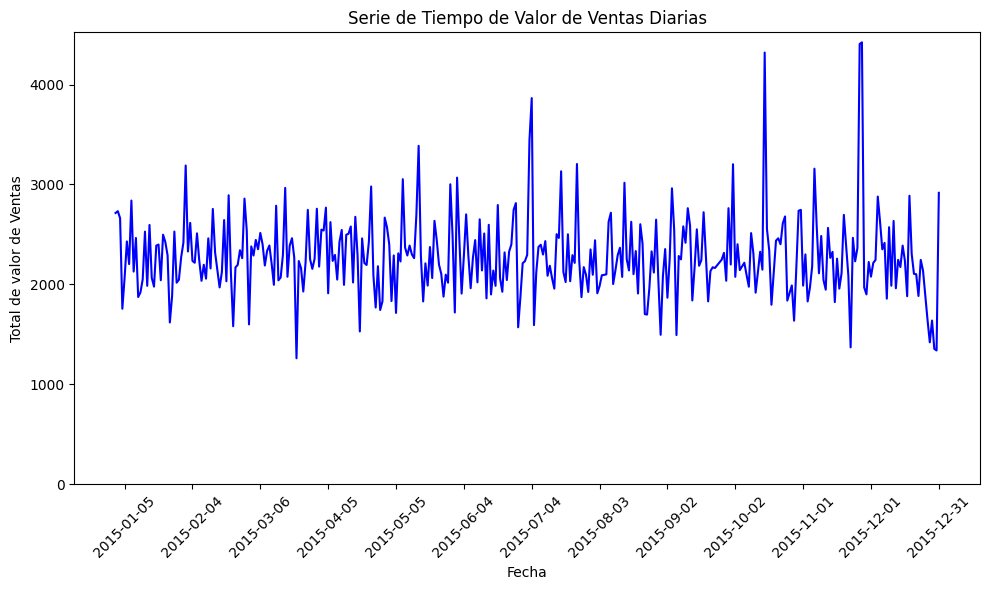

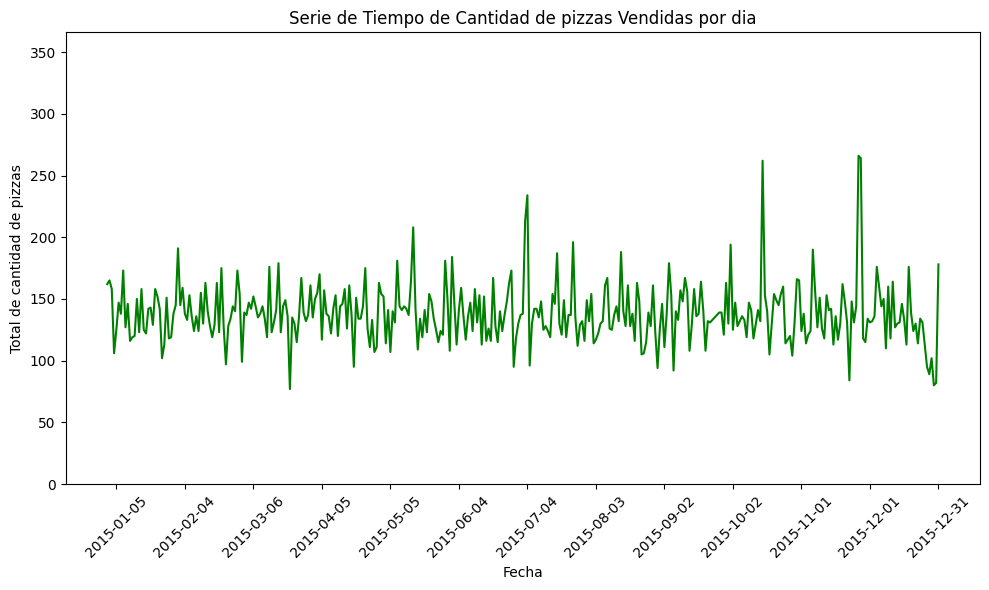

In [2]:
# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo Excel
df = pd.read_excel(r"C:\Users\Davidlizcanom2486\Documents\Timeseries\jbook_ts202330\docs\PizzaSales.xlsx")

# Convertir la columna de fecha, permitiendo que pandas infiera el formato
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=False, errors='coerce')

# Agrupar por fecha y sumar la cantidad de ventas diarias (Total_price)
df_grouped = df.groupby('order_date').agg(total_ventas=('total_price', 'sum')).reset_index()

# Graficar la serie de tiempo de ventas
plt.figure(figsize=(10, 6))
plt.plot(df_grouped['order_date'], df_grouped['total_ventas'], color='blue')

# Etiquetas y título
plt.title("Serie de Tiempo de Valor de Ventas Diarias")
plt.xlabel("Fecha")
plt.ylabel("Total de valor de Ventas")

# Ajustar el eje Y
plt.ylim(0, df_grouped['total_ventas'].max() + 100)  # Ajuste automático del eje Y

# Ampliar el eje X y rotar etiquetas del eje X
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(30))  # Mostrar un punto por mes

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Agrupar por fecha y sumar la cantidad diaria (Quantity)
df_grouped_quantity = df.groupby('order_date').agg(total_quantity=('quantity', 'sum')).reset_index()

# Graficar la serie de tiempo para la variable 'Quantity'
plt.figure(figsize=(10, 6))
plt.plot(df_grouped_quantity['order_date'], df_grouped_quantity['total_quantity'], color='green')

# Etiquetas y título
plt.title("Serie de Tiempo de Cantidad de pizzas Vendidas por dia")
plt.xlabel("Fecha")
plt.ylabel("Total de cantidad de pizzas")

# Ajustar el eje Y
plt.ylim(0, df_grouped_quantity['total_quantity'].max() + 100)  # Ajuste automático del eje Y

# Ampliar el eje X y rotar etiquetas del eje X
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(30))  # Mostrar un punto por mes

# Mostrar el gráfico
plt.tight_layout()
plt.show()

There is a lot more that you can do with outputs (such as including interactive outputs)
with your book. For more information about this, see [the Jupyter Book documentation](https://jupyterbook.org)

# Análisis de la gráfica de ventas diarias de pizzas en 2015

La gráfica de la serie de tiempo muestra un panorama detallado del comportamiento de las ventas diarias de pizzas durante todo el año 2015. Al observar los datos en conjunto, es posible profundizar en varios aspectos que ofrecen una visión más completa de cómo se desarrollaron las ventas a lo largo del tiempo.

## Fluctuaciones y picos de ventas

A lo largo del año, se notan fluctuaciones significativas en el valor total de las ventas diarias. Estas variaciones reflejan cambios en la cantidad de pedidos recibidos, que pueden estar influenciados por distintos factores como la estacionalidad, promociones, fines de semana, o eventos específicos que incrementaron la demanda de pizzas.

### Picos notables

Varios picos elevados se observan durante el año, con un máximo hacia finales de noviembre o principios de diciembre. Estos picos podrían coincidir con eventos especiales como días festivos (por ejemplo, Acción de Gracias en EE.UU. o el inicio de la temporada navideña), fines de semana más ocupados o promociones en el negocio de pizzas. Identificar qué eventos o circunstancias motivan estos aumentos en las ventas sería clave para planificar campañas de marketing o ajustar la logística y el inventario en futuras ocasiones.

## Posibles patrones estacionales

El comportamiento de las ventas muestra algunos patrones que podrían estar relacionados con la estacionalidad. Aunque la gráfica no revela una tendencia ascendente o descendente clara, sí parece haber fluctuaciones recurrentes que podrían correlacionarse con ciclos de consumo típicos en ciertos períodos del año, como el verano, las festividades de fin de año o la temporada de regreso a clases.

## Eventos clave

Los negocios de comida rápida, en especial los que venden pizzas, suelen ver un incremento en ventas durante eventos deportivos (Super Bowl, torneos), celebraciones como Halloween o el Día de la Independencia, y fechas con festividades familiares. Esto es algo que se puede investigar en más detalle con análisis adicionales para identificar correlaciones con fechas clave.

## Comportamiento regular vs. días anómalos

Un punto importante es que, a lo largo del año, las ventas diarias oscilan entre los 1500 y 3000 dólares. Este rango parece ser el comportamiento habitual del negocio. Sin embargo, hay días en los que las ventas caen de manera drástica, llegando a valores cercanos a 0, lo que podría deberse a días de cierre, problemas operativos, o simplemente a días con baja demanda. Por otro lado, los días con picos altos indican una demanda muy por encima del promedio, lo que puede generar cargas operativas extra para el negocio.

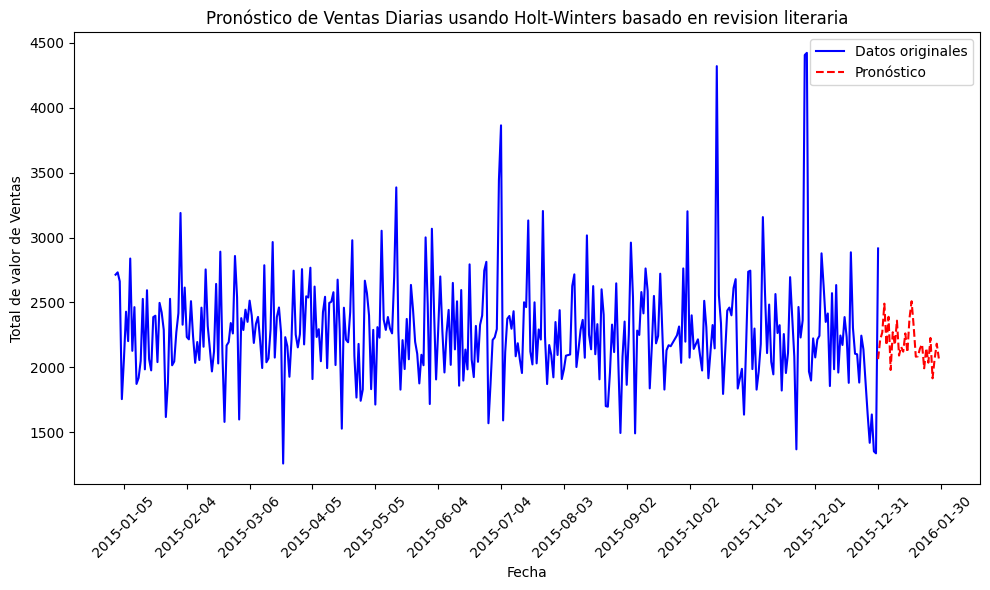

In [3]:
# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Leer el archivo Excel
df = pd.read_excel(r"C:\Users\Davidlizcanom2486\Documents\Timeseries\jbook_ts202330\docs\PizzaSales.xlsx")

# Convertir la columna de fecha, permitiendo que pandas infiera el formato
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=False, errors='coerce')

# Agrupar por fecha y sumar la cantidad de ventas diarias (Total_price)
df_grouped = df.groupby('order_date').agg(total_ventas=('total_price', 'sum')).reset_index()

# Ordenar por fecha en caso de que no esté ordenado
df_grouped = df_grouped.sort_values('order_date')

# Ajustar el modelo Holt-Winters
# Vamos a usar el modo aditivo (si tienes estacionalidad en los datos)
model = ExponentialSmoothing(df_grouped['total_ventas'], 
                             seasonal='add', 
                             seasonal_periods=30,  # Si la estacionalidad es mensual
                             trend='add')  # Considerar tendencia
hw_model = model.fit()

# Realizar predicción para los próximos 30 días
forecast = hw_model.forecast(steps=30)

# Graficar la serie de tiempo original junto con la predicción
plt.figure(figsize=(10, 6))
plt.plot(df_grouped['order_date'], df_grouped['total_ventas'], label='Datos originales', color='blue')
plt.plot(pd.date_range(start=df_grouped['order_date'].iloc[-1], periods=30, freq='D'), 
         forecast, label='Pronóstico', color='red', linestyle='--')

# Etiquetas y título
plt.title("Pronóstico de Ventas Diarias usando Holt-Winters basado en revision literaria")
plt.xlabel("Fecha")
plt.ylabel("Total de valor de Ventas")
plt.legend()

# Ampliar el eje X y rotar etiquetas del eje X
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(30))  # Mostrar un punto por mes

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# El modelo Holt-Winter en el pronóstico de ventas en restaurantes

El modelo Holt-Winter es una opción adecuada para nuestro pronóstico de ventas en un restaurante debido a su capacidad para capturar tanto la *tendencia* como la *estacionalidad* de los datos, lo que es crucial en negocios con fluctuaciones cíclicas anuales como los restaurantes. Este tipo de modelo, como lo explican *Segura Cordero y Bracamonte Orozco*, fue seleccionado en un estudio sobre predicción de ventas en una cadena de restaurantes, ya que demostró ser el método más preciso entre seis alternativas evaluadas, incluyendo promedio móvil y regresión lineal.

## Análisis de la serie temporal

El análisis de la serie temporal utilizado en dicho estudio mostró patrones cíclicos en las ventas, con picos en meses específicos, lo que confirmó la necesidad de un modelo que manejara estos ciclos recurrentes. Se utilizó el método de Holt-Winter *aditivo, que es ideal cuando las fluctuaciones estacionales tienen una magnitud constante a lo largo del tiempo (Segura Cordero y Bracamonte Orozco, 2021). Además, el estudio utilizó la **prueba de Dickey-Fuller* para confirmar la estacionalidad en los datos, lo que validó aún más la elección del modelo.

## Precisión del modelo

El modelo Holt-Winter sobresalió en las pruebas al presentar el menor *error cuadrático medio* entre los métodos comparados, lo que garantiza una mayor precisión en las predicciones. En particular, la capacidad de este modelo para generar pronósticos a corto plazo, con un horizonte de cuatro años y un nivel de confianza del 95%, permitió a la cadena de restaurantes anticiparse a un aumento del 35% en la demanda, lo que demuestra su utilidad para la toma de decisiones estratégicas y operativas.

## Justificación del uso

En resumen, el uso del modelo Holt-Winter está justificado en nuestro caso debido a la estacionalidad marcada y el comportamiento cíclico de las ventas en el restaurante. Además, su implementación es accesible, no requiere software sofisticado ni personal experto, lo que facilita su adopción para optimizar la planificación de inventarios y otras decisiones clave.

c:\Users\Davidlizcanom2486\miniconda3\envs\ts_venv\lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


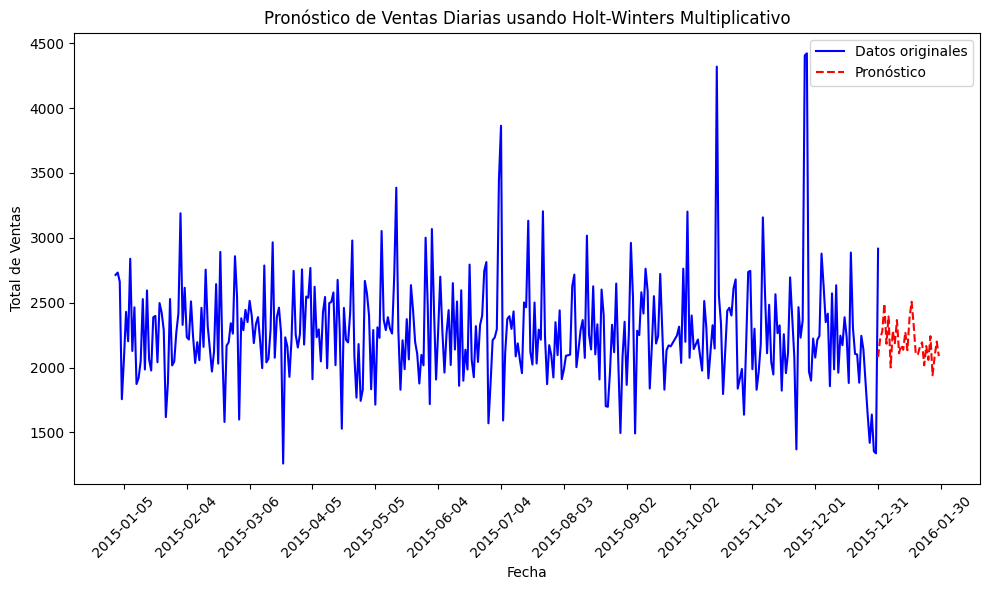

In [4]:
# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Leer el archivo Excel
df = pd.read_excel(r"C:\Users\Davidlizcanom2486\Documents\Timeseries\jbook_ts202330\docs\PizzaSales.xlsx")

# Convertir la columna de fecha, permitiendo que pandas infiera el formato
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=False, errors='coerce')

# Agrupar por fecha y sumar la cantidad de ventas diarias (Total_price)
df_grouped = df.groupby('order_date').agg(total_ventas=('total_price', 'sum')).reset_index()

# Ordenar por fecha en caso de que no esté ordenado
df_grouped = df_grouped.sort_values('order_date')

# Ajustar el modelo Holt-Winters multiplicativo
# Usamos el modelo multiplicativo para tendencia y estacionalidad
model = ExponentialSmoothing(df_grouped['total_ventas'], 
                             seasonal='mul',  # Multiplicativo para estacionalidad
                             seasonal_periods=30,  # Estacionalidad mensual (si aplica)
                             trend='mul')  # Multiplicativo para la tendencia
hw_model = model.fit()

# Realizar predicción para los próximos 30 días
forecast = hw_model.forecast(steps=30)

# Graficar la serie de tiempo original junto con la predicción
plt.figure(figsize=(10, 6))
plt.plot(df_grouped['order_date'], df_grouped['total_ventas'], label='Datos originales', color='blue')
plt.plot(pd.date_range(start=df_grouped['order_date'].iloc[-1], periods=30, freq='D'), 
         forecast, label='Pronóstico', color='red', linestyle='--')

# Etiquetas y título
plt.title("Pronóstico de Ventas Diarias usando Holt-Winters Multiplicativo")
plt.xlabel("Fecha")
plt.ylabel("Total de Ventas")
plt.legend()

# Ampliar el eje X y rotar etiquetas del eje X
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(30))  # Mostrar un punto por mes

# Mostrar el gráfico
plt.tight_layout()
plt.show()

El modelo Holt-Winters multiplicativo puede ser muy adecuado para predecir las ventas diarias de pizzas en 2015 debido a los patrones observados en la serie temporal descrita en el análisis.

### 1. *Patrones de Estacionalidad*
   En el análisis mencionas que hay fluctuaciones recurrentes que podrían correlacionarse con ciclos de consumo típicos durante ciertos períodos del año (verano, festividades, regreso a clases, etc.). El modelo multiplicativo es particularmente útil cuando los efectos estacionales no son constantes, sino proporcionales al nivel general de ventas. Esto significa que si, por ejemplo, las ventas suben en diciembre debido a festividades, el incremento estacional será mayor cuanto más altas sean las ventas regulares.

   - *Cómo ayuda el modelo multiplicativo*: Si las ventas de pizzas aumentan más durante temporadas altas, el modelo multiplicativo captura este fenómeno. A diferencia del modelo aditivo, que asume un cambio constante, el multiplicativo ajusta la estacionalidad de manera proporcional, lo que resulta en predicciones más precisas cuando hay efectos de este tipo.

### 2. *Picos Notables en Ventas*
   Los picos observados en la serie, como los de noviembre o diciembre, podrían estar relacionados con eventos estacionales, festividades o promociones. El modelo multiplicativo puede captar estos aumentos si están relacionados con la estacionalidad o tendencias proporcionales al nivel de ventas.

   - *Ejemplo de comportamiento multiplicativo*: Si en un período de baja demanda (ej. febrero) las ventas solo suben un 10% por un evento, pero en diciembre (una época de alta demanda) suben un 30% por el mismo tipo de evento, el modelo multiplicativo reflejará adecuadamente este comportamiento, ya que asume que las fluctuaciones estacionales crecen en magnitud junto con el nivel general de ventas.

### 3. *Comportamiento Regular y Anómalos*
   El modelo multiplicativo también puede gestionar días anómalos de manera eficiente. Dado que la estacionalidad y la tendencia se escalan en función del nivel de la serie, los días con ventas anormalmente bajas o altas pueden influir menos en las predicciones generales del modelo.

   - *Cómo maneja esto el modelo multiplicativo*: Los días con caídas significativas en las ventas o picos muy altos pueden ser tratados como variaciones estacionales proporcionales al nivel de ventas en lugar de ser vistos como desviaciones constantes. Esto suaviza el impacto de esos días anómalos en el modelo.

### 4. *Ausencia de una Tendencia Clara*
   Aunque no parece haber una tendencia ascendente o descendente evidente en las ventas generales, un modelo multiplicativo puede ajustarse a fluctuaciones que dependen del nivel de ventas, lo que lo hace más flexible. Si, por ejemplo, hay períodos en los que el negocio tiene un nivel general más alto o más bajo de ventas, el modelo multiplicativo adaptará tanto la tendencia como la estacionalidad proporcionalmente a esos niveles.

### Conclusión:
El modelo Holt-Winters multiplicativo es adecuado para este escenario porque captura mejor los cambios en las ventas que son proporcionales al nivel general de demanda, algo que parece estar presente en la serie temporal de ventas de pizzas en 2015, especialmente en relación con los picos y patrones estacionales.